In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast
from tqdm import tqdm
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_lr)]
    else:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_hr)]
    data = np.array([signal for signal, meta in data])
    return data

In [3]:
path = '../ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

print('data shpae:', X.shape)
Y[['scp_codes']]
Y

100%|████████████████████████████████████████████████████████████████████████████| 21837/21837 [07:29<00:00, 48.58it/s]


data shpae: (21837, 1000, 12)


,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [4]:
#Load Data for Heart Beat Diagnostic

In [5]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]
print(agg_df.shape)
agg_df.head()

(44, 12)


,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [6]:
def aggregate_supclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))
    
# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_supclass_diagnostic)
Y['diagnostic_superclass_len'] = Y['diagnostic_superclass'].apply(len)
Y.loc[Y.diagnostic_superclass_len > 1, 'diagnostic_superclass']

ecg_id
39       [STTC, MI]
45        [CD, HYP]
50         [CD, MI]
77         [CD, MI]
87       [CD, STTC]
            ...    
21815      [CD, MI]
21821    [CD, NORM]
21827    [STTC, MI]
21828    [STTC, MI]
21829    [CD, NORM]
Name: diagnostic_superclass, Length: 5158, dtype: object

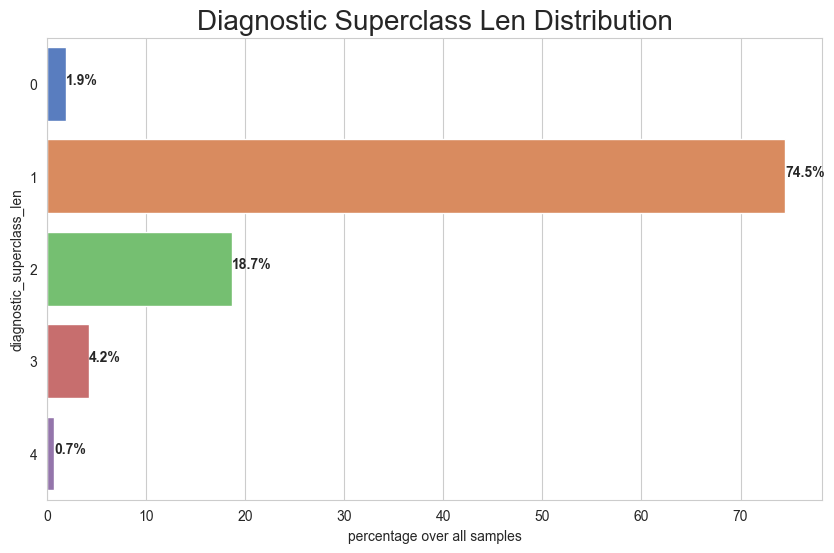

In [7]:
vc = Y['diagnostic_superclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Superclass Len Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_superclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

In [8]:
#Number of Subclass per ECG record

In [9]:
def aggregate_subclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    ret = list(set(tmp))
    ret = ['sub_'+r for r in ret] # to distinguish between subclass and superclass columns
    return ret

# Apply diagnostic subclass
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_subclass_diagnostic)
Y['diagnostic_subclass_len'] = Y['diagnostic_subclass'].apply(len)
Y.loc[Y.diagnostic_subclass_len > 1, 'diagnostic_subclass']

ecg_id
26                    [sub_NST_, sub_STTC]
28                    [sub_NST_, sub_STTC]
39           [sub_NST_, sub_STTC, sub_IMI]
45       [sub_IRBBB, sub_RVH, sub_RAO/RAE]
50                     [sub_LMI, sub_IVCD]
                       ...                
21821                [sub_IRBBB, sub_NORM]
21827                  [sub_ISCA, sub_IMI]
21828                  [sub_ISCA, sub_IMI]
21829                [sub_IRBBB, sub_NORM]
21832            [sub_LAFB/LPFB, sub_IVCD]
Name: diagnostic_subclass, Length: 6191, dtype: object

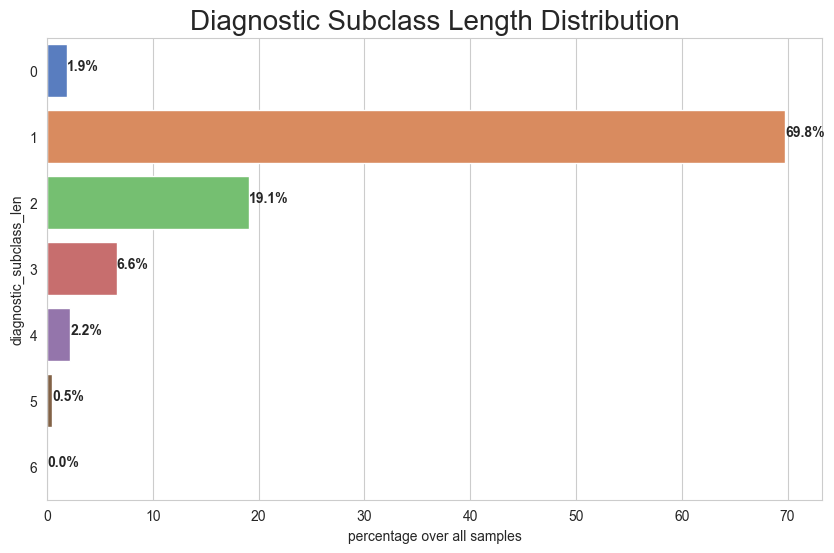

In [10]:
vc = Y['diagnostic_subclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Subclass Length Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_subclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )


In [11]:
all_superclass = pd.Series(np.concatenate(Y['diagnostic_superclass'].values))
all_subclass = pd.Series(np.concatenate(Y['diagnostic_subclass'].values))
superclass_cols = all_superclass.unique()
subclass_cols = all_subclass.unique()
update_cols = np.concatenate([superclass_cols, subclass_cols]) # add meta data columns
meta_cols = ['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device',] # could add more columns as features

In [12]:
#Reformat Data

In [13]:
class ClassUpdate():
    def __init__(self, cols):
        self.cols = cols

    def __call__(self, row):
        for sc in row['diagnostic_superclass']:
            row[sc] = 1
        for sc in row['diagnostic_subclass']:
            row[sc] = 1
            
        return row

def get_data_by_folds(folds, x, y, update_cols, feature_cols):
    assert len(folds)  > 0, '# of provided folds should longer than 1'
    #print(y.strat_fold)
    filt = np.isin(y.strat_fold.values, folds)
    x_selected = x[filt]
    y_selected = y[filt]
    
    for sc in update_cols:
        y_selected[sc] = 0
        
    cls_updt = ClassUpdate(update_cols)
    
    y_selected = y_selected.apply(cls_updt, axis=1)
    
    return x_selected, y_selected[list(feature_cols)+list(update_cols)+['strat_fold']]

In [14]:
x_all, y_all = get_data_by_folds(np.arange(1, 11), X, Y, update_cols, meta_cols)

In [15]:
y_all

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,7
21834,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,4
21835,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,2


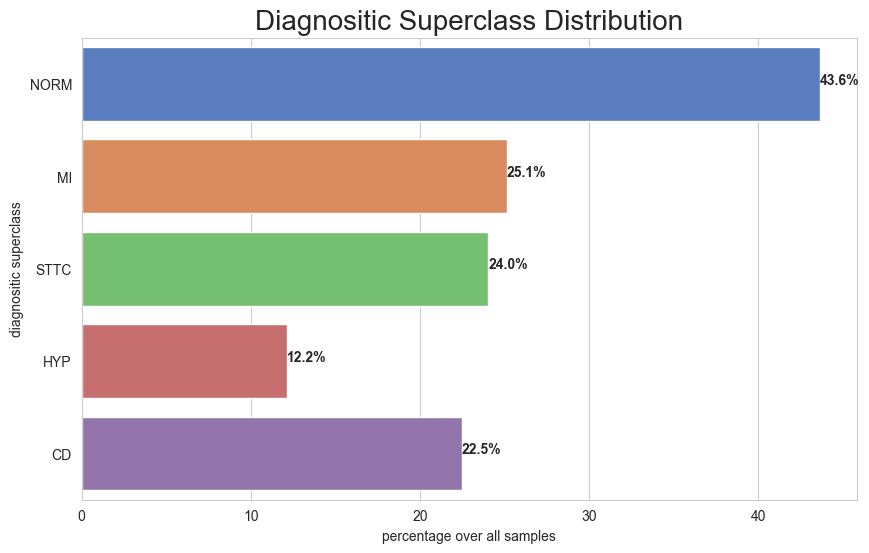

In [16]:
vc = y_all[superclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Superclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic superclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

In [17]:
#ECG Example

In [18]:
y_all['NORM']

ecg_id
1        1
2        1
3        1
4        1
5        1
        ..
21833    0
21834    1
21835    0
21836    1
21837    1
Name: NORM, Length: 21837, dtype: int64

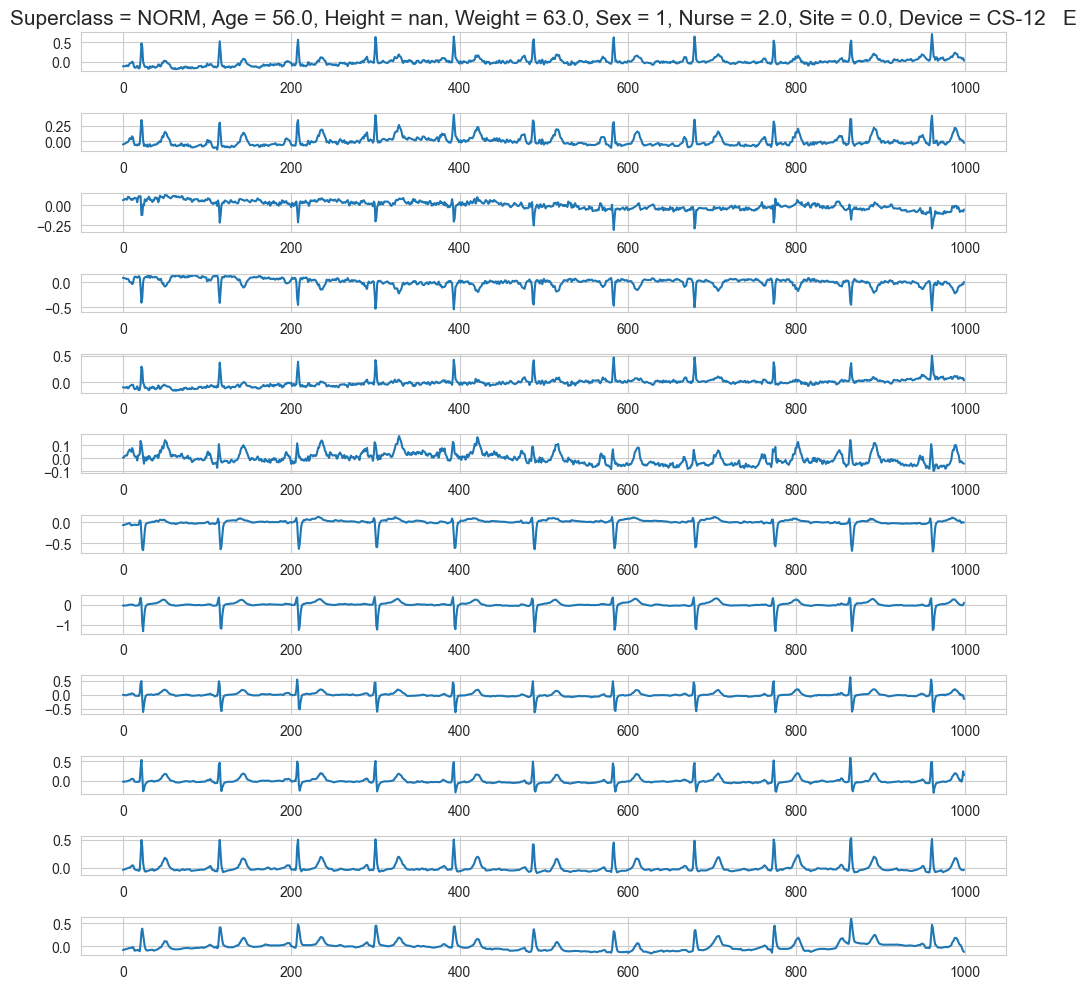

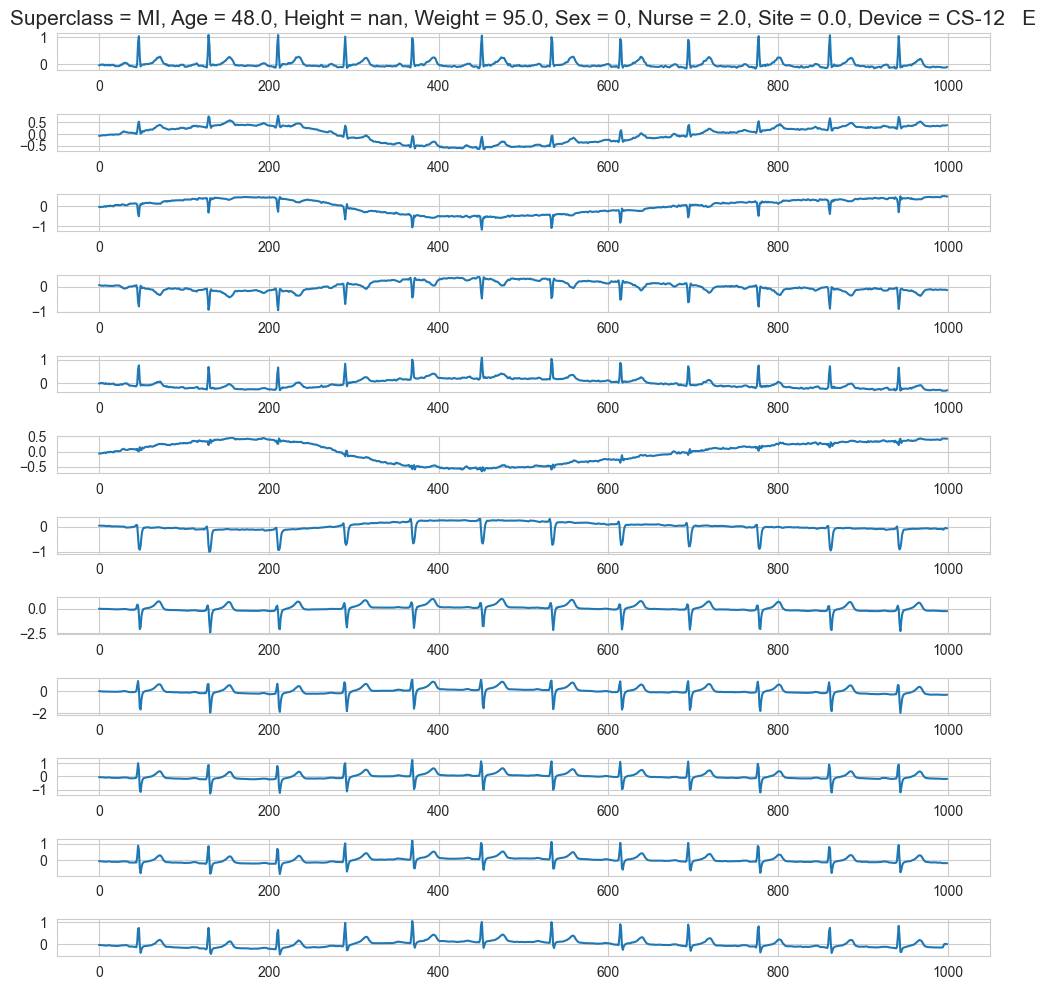

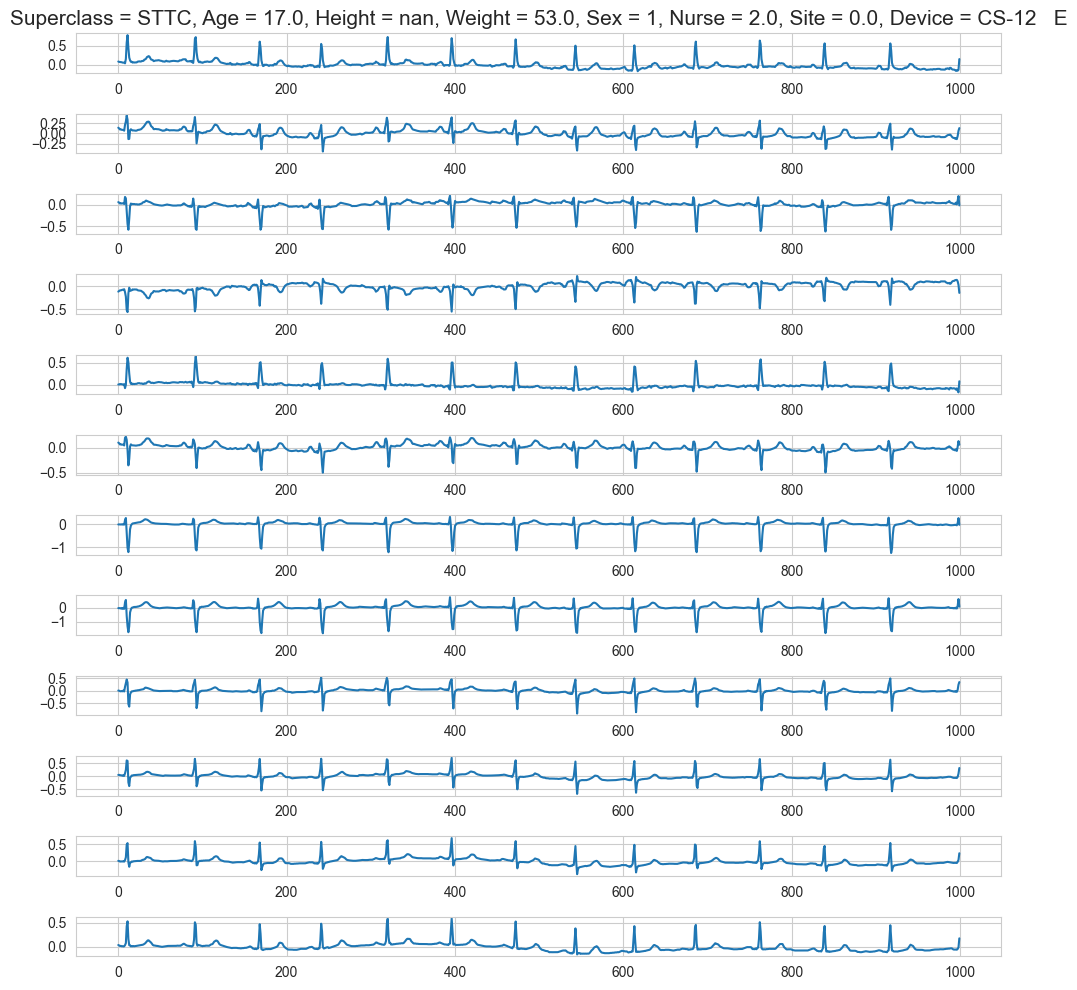

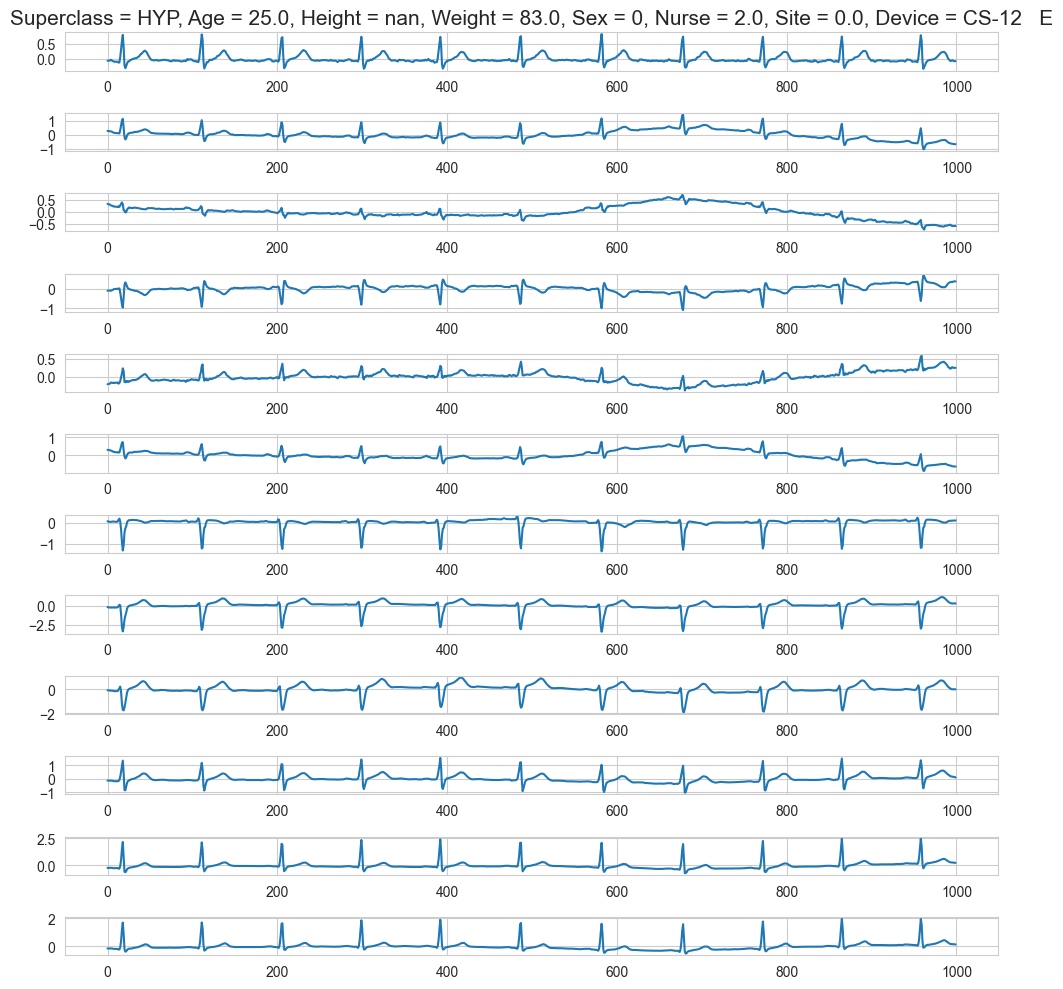

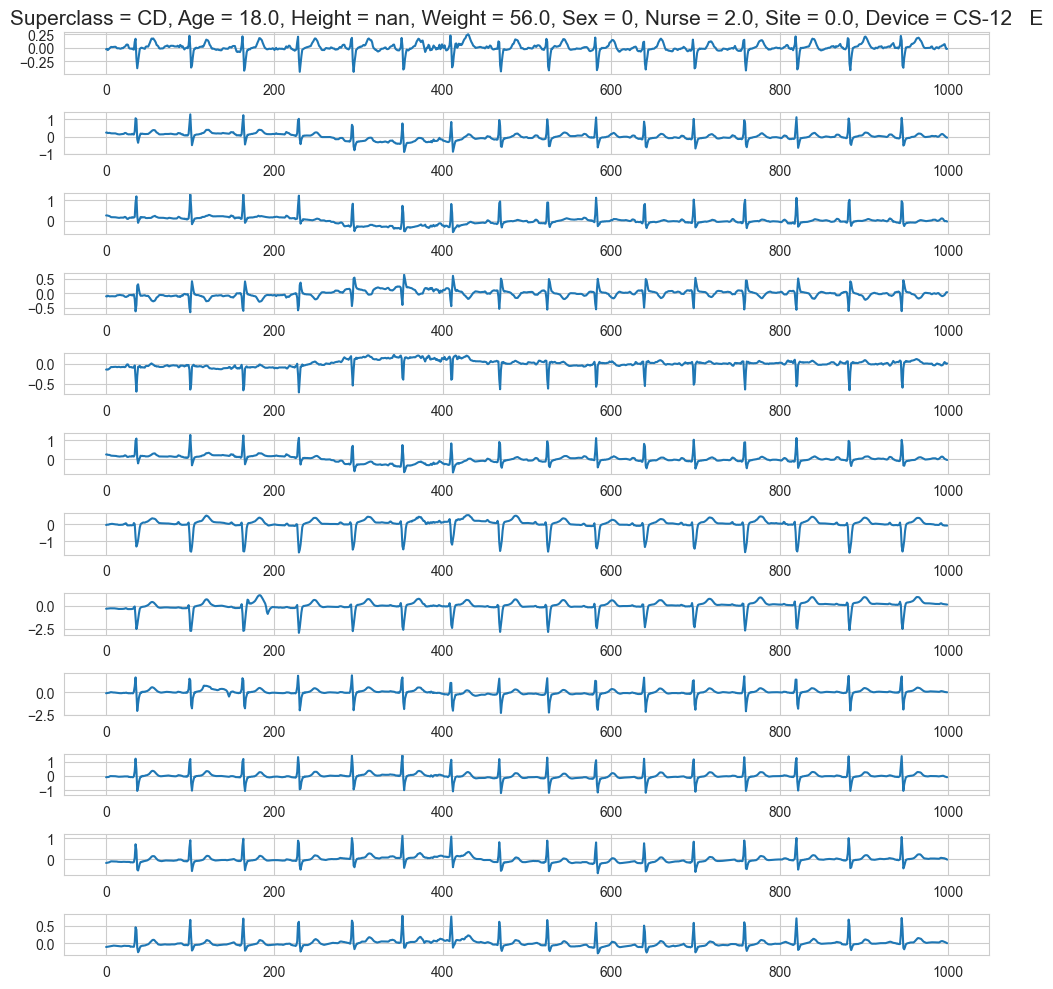

In [19]:
sample_num = 1

for superclass in superclass_cols:
    filt = y_all[superclass] == 1
    y_selected = y_all.loc[filt]
    x_selected = x_all[filt]
    
    for i in range(sample_num):
        y_ = y_selected.iloc[i]
        x_ = x_selected[i]
        
        #display(y_)
        #print(y_.shape, x_.shape); assert False
        bar, axes = plt.subplots(x_.shape[1], 1, figsize=(10,10))
        title = "Superclass = {}, Age = {}, Height = {}, Weight = {}, Sex = {}, Nurse = {}, Site = {}, Device = {}".format(superclass, 
                                                                                                                           y_['age'], y_['height'], y_['weight'],
                                                                                                                           y_['sex'], y_['nurse'], y_['site'], y_['device'],)
        axes[0].set_title(title, fontsize=15)
        
        for c in np.arange(x_.shape[1]):
            sns.lineplot(x=np.arange(x_.shape[0]), y=x_[:, c], ax=axes[c])
        
        plt.tight_layout()
        plt.show()
        #assert False

In [20]:
#Extracted Features
extfea_path = '../ptb-xl-a-comprehensive-electrocardiographic-feature-dataset-1.0.1/features/'
extfea_data = pd.read_csv(extfea_path+'ecgdeli_features.csv', index_col='ecg_id')


In [21]:
extfea_data.shape

(21799, 531)

In [22]:
Y_new = Y[:extfea_data.shape[0]]

In [23]:
Y_new.shape

(21799, 31)

In [24]:
X_new = X[:extfea_data.shape[0]]

In [25]:
X_new.shape

(21799, 1000, 12)

In [26]:
# raw_signal = X[:extfea_data.shape[0]]
# raw_signal = raw_signal[Y_new.diagnostic_superclass_len == 1]
# raw_signal.shape

In [27]:
# leads_I = []
# leads_II = []
# leads_III = []
# leads_aVR = []
# leads_aVL = []
# leads_aVF = []
# leads_V1 = []
# leads_V2 = []
# leads_V3 = []
# leads_V4 = []
# leads_V5 = []
# leads_V6 = []

# for leads in raw_signal :
#     temp = []
#     lead_I = leads[:, 0]
#     lead_II = leads[:, 1]
#     lead_III = leads[:, 2]
#     lead_aVR = leads[:, 3]
#     lead_aVL = leads[:, 4]
#     lead_aVF = leads[:, 5]
#     lead_V1 = leads[:, 6]
#     lead_V2 = leads[:, 7]
#     lead_V3 = leads[:, 8]
#     lead_V4 = leads[:, 9]
#     lead_V5 = leads[:, 10]
#     lead_V6 = leads[:, 11]
    
#     leads_I.append(lead_I)
#     leads_II.append(lead_II)
#     leads_III.append(lead_III)
#     leads_aVR.append(lead_aVR)
#     leads_aVL.append(lead_aVL)
#     leads_aVF.append(lead_aVF)
#     leads_V1.append(lead_V1)
#     leads_V2.append(lead_V2)
#     leads_V3.append(lead_V3)
#     leads_V4.append(lead_V4)
#     leads_V5.append(lead_V5)
#     leads_V6.append(lead_V6)

In [28]:
X_new = Y_new.assign(
        #RR_Mean
        RR_Mean_Global = extfea_data['RR_Mean_Global'],
    
        #ST_Elevation
        ST_Elev_I = extfea_data['ST_Elev_I'],
        ST_Elev_II = extfea_data['ST_Elev_II'],
        ST_Elev_III = extfea_data['ST_Elev_III'],
        ST_Elev_V1 = extfea_data['ST_Elev_V1'],
        ST_Elev_V2 = extfea_data['ST_Elev_V2'],
        ST_Elev_V3 = extfea_data['ST_Elev_V3'],
        ST_Elev_V4 = extfea_data['ST_Elev_V4'],
        ST_Elev_V5 = extfea_data['ST_Elev_V5'],
        ST_Elev_V6 = extfea_data['ST_Elev_V6'],
        ST_Elev_aVF = extfea_data['ST_Elev_aVF'],
        ST_Elev_aVR = extfea_data['ST_Elev_aVR'],
        ST_Elev_aVL = extfea_data['ST_Elev_aVL'],
    
        #PR_Interval
        PR_Int_Global = extfea_data['PR_Int_Global'],
        PR_Int_I = extfea_data['PR_Int_I'],
        PR_Int_II = extfea_data['PR_Int_II'],
        PR_Int_III = extfea_data['PR_Int_III'],
        PR_Int_V1 = extfea_data['PR_Int_V1'],
        PR_Int_V2 = extfea_data['PR_Int_V2'],
        PR_Int_V3 = extfea_data['PR_Int_V3'],
        PR_Int_V4 = extfea_data['PR_Int_V4'],
        PR_Int_V5 = extfea_data['PR_Int_V5'],
        PR_Int_V6 = extfea_data['PR_Int_V6'],
        PR_Int_aVF = extfea_data['PR_Int_aVF'],
        PR_Int_aVL = extfea_data['PR_Int_aVL'],
        PR_Int_aVR = extfea_data['PR_Int_aVR'],
    
        #PQ_Interval
        PQ_Int_Global = extfea_data['PQ_Int_Global'],
        PQ_Int_I = extfea_data['PQ_Int_I'],
        PQ_Int_II = extfea_data['PQ_Int_II'],
        PQ_Int_III = extfea_data['PQ_Int_III'],
        PQ_Int_V1 = extfea_data['PQ_Int_V1'],
        PQ_Int_V2 = extfea_data['PQ_Int_V2'],
        PQ_Int_V3 = extfea_data['PQ_Int_V3'],
        PQ_Int_V4 = extfea_data['PQ_Int_V4'],
        PQ_Int_V5 = extfea_data['PQ_Int_V5'],
        PQ_Int_V6 = extfea_data['PQ_Int_V6'],
        PQ_Int_aVF = extfea_data['PQ_Int_aVF'],
        PQ_Int_aVL = extfea_data['PQ_Int_aVL'],
        PQ_Int_aVR = extfea_data['PQ_Int_aVR'],
    
        #QRS_Duration
        QRS_Dur_I = extfea_data['QRS_Dur_I'],
        QRS_Dur_II = extfea_data['QRS_Dur_II'],
        QRS_Dur_III = extfea_data['QRS_Dur_III'],
        QRS_Dur_V1 = extfea_data['QRS_Dur_V1'],
        QRS_Dur_V2 = extfea_data['QRS_Dur_V2'],
        QRS_Dur_V3 = extfea_data['QRS_Dur_V3'],
        QRS_Dur_V4 = extfea_data['QRS_Dur_V4'],
        QRS_Dur_V5 = extfea_data['QRS_Dur_V5'],
        QRS_Dur_V6 = extfea_data['QRS_Dur_V6'],
        QRS_Dur_aVF = extfea_data['QRS_Dur_aVF'],
        QRS_Dur_aVL = extfea_data['QRS_Dur_aVL'],
        QRS_Dur_aVR = extfea_data['QRS_Dur_aVR'],
    
        #QT_Interval
        QT_Int_I = extfea_data['QT_Int_I'],
        QT_Int_II = extfea_data['QT_Int_II'],
        QT_Int_III = extfea_data['QT_Int_III'],
        QT_Int_V1 = extfea_data['QT_Int_V1'],
        QT_Int_V2 = extfea_data['QT_Int_V2'],
        QT_Int_V3 = extfea_data['QT_Int_V3'],
        QT_Int_V4 = extfea_data['QT_Int_V4'],
        QT_Int_V5 = extfea_data['QT_Int_V5'],
        QT_Int_V6 = extfea_data['QT_Int_V6'],
        QT_Int_aVF = extfea_data['QT_Int_aVF'],
        QT_Int_aVL = extfea_data['QT_Int_aVL'],
        QT_Int_aVR = extfea_data['QT_Int_aVR'],
    
        #R_Amplitudo
        R_Amp_I = extfea_data['R_Amp_I'],
        R_Amp_II = extfea_data['R_Amp_II'],
        R_Amp_III = extfea_data['R_Amp_III'],
        R_Amp_V1 = extfea_data['R_Amp_V1'],
        R_Amp_V2 = extfea_data['R_Amp_V2'],
        R_Amp_V3 = extfea_data['R_Amp_V3'],
        R_Amp_V4 = extfea_data['R_Amp_V4'],
        R_Amp_V5 = extfea_data['R_Amp_V5'],
        R_Amp_V6 = extfea_data['R_Amp_V6'],
        R_Amp_aVF = extfea_data['R_Amp_aVF'],
        R_Amp_aVL = extfea_data['R_Amp_aVL'],
        R_Amp_aVR = extfea_data['R_Amp_aVR'],
    
        #Q_Amplitudo
        Q_Amp_I = extfea_data['Q_Amp_I'],
        Q_Amp_II = extfea_data['Q_Amp_II'],
        Q_Amp_III = extfea_data['Q_Amp_III'],
        Q_Amp_V1 = extfea_data['Q_Amp_V1'],
        Q_Amp_V2 = extfea_data['Q_Amp_V2'],
        Q_Amp_V3 = extfea_data['Q_Amp_V3'],
        Q_Amp_V4 = extfea_data['Q_Amp_V4'],
        Q_Amp_V5 = extfea_data['Q_Amp_V5'],
        Q_Amp_V6 = extfea_data['Q_Amp_V6'],
        Q_Amp_aVF = extfea_data['Q_Amp_aVF'],
        Q_Amp_aVL = extfea_data['Q_Amp_aVL'],
        Q_Amp_aVR = extfea_data['Q_Amp_aVR'],
        
        #P_Amplitudo
        P_Amp_I = extfea_data['P_Amp_I'],
        P_Amp_II = extfea_data['P_Amp_II'],
        P_Amp_III = extfea_data['P_Amp_III'],
        P_Amp_V1 = extfea_data['P_Amp_V1'],
        P_Amp_V2 = extfea_data['P_Amp_V2'],
        P_Amp_V3 = extfea_data['P_Amp_V3'],
        P_Amp_V4 = extfea_data['P_Amp_V4'],
        P_Amp_V5 = extfea_data['P_Amp_V5'],
        P_Amp_V6 = extfea_data['P_Amp_V6'],
        P_Amp_aVF = extfea_data['P_Amp_aVF'],
        P_Amp_aVL = extfea_data['P_Amp_aVL'],
        P_Amp_aVR = extfea_data['P_Amp_aVR']

)

        

In [29]:
#Select Record with single superclass label
X_selected = X_new[Y_new.diagnostic_superclass_len == 1]
Y_selected = Y_new.loc[Y_new.diagnostic_superclass_len == 1]

In [30]:
selected_feature = ['RR_Mean_Global',
                    'ST_Elev_I','ST_Elev_II','ST_Elev_III',
                    'ST_Elev_V1','ST_Elev_V2', 'ST_Elev_V3', 'ST_Elev_V4', 'ST_Elev_V5', 'ST_Elev_V6',
                    'ST_Elev_aVF','ST_Elev_aVL', 'ST_Elev_aVR',
                    'PR_Int_I','PR_Int_II','PR_Int_III',
                    'PR_Int_V1','PR_Int_V2','PR_Int_V3', 'PR_Int_V4', 'PR_Int_V5', 'PR_Int_V6',
                    'PR_Int_aVF','PR_Int_aVL', 'PR_Int_aVR',
                    'PQ_Int_Global','PQ_Int_I','PQ_Int_II','PQ_Int_III',
                    'PQ_Int_V1','PQ_Int_V2','PQ_Int_V3', 'PQ_Int_V4', 'PQ_Int_V5', 'PQ_Int_V6',
                    'PQ_Int_aVF','PQ_Int_aVL', 'PQ_Int_aVR',
                    'QRS_Dur_I','QRS_Dur_II','QRS_Dur_III',
                    'QRS_Dur_V1','QRS_Dur_V2','QRS_Dur_V3','QRS_Dur_V4','QRS_Dur_V5','QRS_Dur_V6',
                    'QRS_Dur_aVF','QRS_Dur_aVL','QRS_Dur_aVR',
                    'QT_Int_I','QT_Int_II','QT_Int_III',
                    'QT_Int_V1','QT_Int_V2','QT_Int_V3', 'QT_Int_V4', 'QT_Int_V5', 'QT_Int_V6',
                    'QT_Int_aVF','QT_Int_aVL', 'QT_Int_aVR',
                    'R_Amp_I','R_Amp_II','R_Amp_III',
                    'R_Amp_V1','R_Amp_V2','R_Amp_V3', 'R_Amp_V4', 'R_Amp_V5', 'R_Amp_V6',
                    'R_Amp_aVF','R_Amp_aVL', 'R_Amp_aVR',
                    'Q_Amp_I','Q_Amp_II','Q_Amp_III',
                    'Q_Amp_V1','Q_Amp_V2','Q_Amp_V3', 'Q_Amp_V4', 'Q_Amp_V5', 'Q_Amp_V6',
                    'Q_Amp_aVF','Q_Amp_aVL', 'Q_Amp_aVR',
                    'P_Amp_I','P_Amp_II','P_Amp_III',
                    'P_Amp_V1','P_Amp_V2','P_Amp_V3', 'P_Amp_V4', 'P_Amp_V5', 'P_Amp_V6',
                    'P_Amp_aVF','P_Amp_aVL', 'P_Amp_aVR'
                                
                    ]
X_selected_feature = X_selected[selected_feature]

In [31]:
# X_selected_feature['lead_I'] = leads_I
# X_selected_feature['lead_II'] = leads_II
# X_selected_feature['lead_III'] = leads_III
# X_selected_feature['lead_aVR'] = leads_aVR
# X_selected_feature['lead_aVL'] = leads_aVL
# X_selected_feature['lead_aVF'] = leads_aVF
# X_selected_feature['lead_V1'] = leads_V1
# X_selected_feature['lead_V2'] = leads_V2
# X_selected_feature['lead_V3'] = leads_V3
# X_selected_feature['lead_V4'] = leads_V4
# X_selected_feature['lead_V5'] = leads_V5
# X_selected_feature['lead_V6'] = leads_V6

In [32]:
labels = []
for i in range(len(Y_selected)) :
    if Y_selected['diagnostic_superclass'].iloc[i] == ['NORM']:
        labels.append('NORM')
    elif Y_selected['diagnostic_superclass'].iloc[i] == ['MI'] :
        labels.append('MI')
    elif Y_selected['diagnostic_superclass'].iloc[i] == ['STTC'] :
        labels.append('STTC')
    elif Y_selected['diagnostic_superclass'].iloc[i] == ['HYP'] :
        labels.append('HYP')
    elif Y_selected['diagnostic_superclass'].iloc[i] == ['CD'] :
        labels.append('CD')

In [33]:
df_labels = pd.DataFrame(labels, columns = ['labels'])

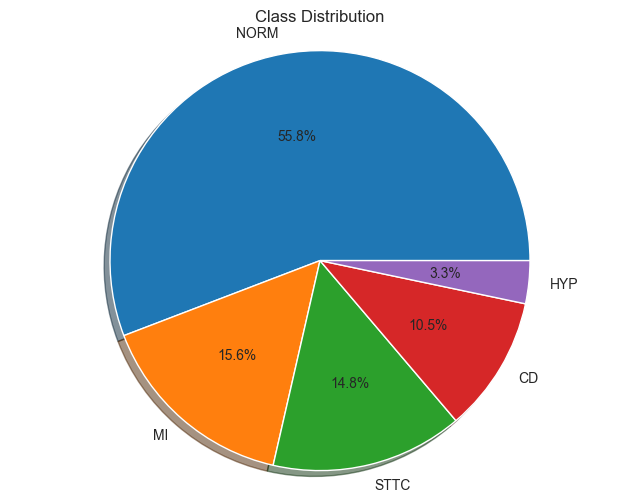

In [34]:
class_distribution_before = df_labels['labels'].value_counts()
# Generate a pie chart for class distribution before oversampling
plt.figure(figsize=(8, 6))
plt.pie(class_distribution_before, labels=class_distribution_before.index, autopct='%1.1f%%', shadow=True)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [35]:
X_selected.shape

(16241, 130)

In [36]:
df_labels['strat_fold'] = Y_selected['strat_fold'].tolist()

In [37]:
df_labels_filter = df_labels
df_labels_filter.loc[df_labels_filter["labels"] == "STTC", "labels"] = "OTHER"
df_labels_filter.loc[df_labels_filter["labels"] == "HYP", "labels"] = "OTHER"
df_labels_filter.loc[df_labels_filter["labels"] == "CD", "labels"] = "OTHER"
print(df_labels_filter['labels'].value_counts())

NORM     9065
OTHER    4642
MI       2534
Name: labels, dtype: int64


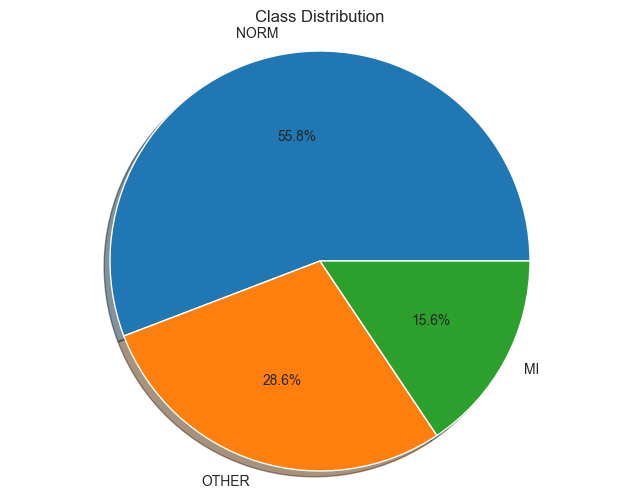

In [38]:
class_distribution_after= df_labels_filter['labels'].value_counts()
# Generate a pie chart for class distribution before oversampling
plt.figure(figsize=(8, 6))
plt.pie(class_distribution_after, labels=class_distribution_after.index, autopct='%1.1f%%', shadow=True)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [39]:
X_selected_feature = X_selected_feature.fillna(0)
X_selected_feature 

,RR_Mean_Global,ST_Elev_I,ST_Elev_II,ST_Elev_III,ST_Elev_V1,ST_Elev_V2,ST_Elev_V3,ST_Elev_V4,ST_Elev_V5,ST_Elev_V6,...,P_Amp_III,P_Amp_V1,P_Amp_V2,P_Amp_V3,P_Amp_V4,P_Amp_V5,P_Amp_V6,P_Amp_aVF,P_Amp_aVL,P_Amp_aVR
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,935.0,0.030,0.01,0.080,0.46,0.31,0.140,0.060,0.030,0.000,...,0.03,0.010,0.03,0.040,0.020,0.03,0.04,0.030,0.050,-0.08
2,1276.0,0.820,0.15,-0.250,-0.04,0.91,0.930,0.250,0.870,0.860,...,0.03,0.010,0.03,-0.010,-0.040,0.04,0.02,0.110,0.030,-0.06
3,935.0,0.680,-0.03,-0.120,-0.12,0.72,0.200,0.320,0.790,0.180,...,0.04,0.050,0.04,-0.020,-0.010,0.01,-0.03,0.000,0.010,-0.05
4,790.0,0.040,-0.04,-0.220,0.22,0.13,0.140,0.030,0.020,0.000,...,0.03,-0.060,-0.12,-0.170,-0.170,-0.14,-0.10,0.000,-0.030,-0.07
5,901.0,0.030,-0.06,-0.090,-0.49,0.21,0.070,0.000,-0.010,-0.010,...,0.02,0.070,0.01,-0.040,-0.040,-0.03,-0.01,0.050,0.020,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21793,716.0,0.000,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,...,0.12,-0.080,-0.12,-0.110,-0.010,0.03,0.04,0.090,-0.020,-0.04
21794,871.0,-0.020,-0.07,-0.100,0.01,0.17,0.160,0.060,-0.100,-0.140,...,0.01,0.000,-0.07,-0.100,-0.090,-0.04,-0.03,-0.020,0.010,0.03
21795,864.0,0.125,0.08,0.010,0.67,0.42,0.325,0.180,0.125,0.105,...,0.08,0.015,-0.06,-0.155,-0.165,-0.07,-0.03,0.075,-0.045,-0.03


In [40]:
Y_selected.shape

(16241, 31)

In [41]:
df_features_label = X_selected_feature
df_features_label['labels'] = df_labels_filter['labels'].tolist()
df_features_label['strat_fold'] = df_labels_filter['strat_fold'].tolist()
df_features_label.iloc[:,60:76]

,QT_Int_aVL,QT_Int_aVR,R_Amp_I,R_Amp_II,R_Amp_III,R_Amp_V1,R_Amp_V2,R_Amp_V3,R_Amp_V4,R_Amp_V5,R_Amp_V6,R_Amp_aVF,R_Amp_aVL,R_Amp_aVR,Q_Amp_I,Q_Amp_II
ecg_id,,,,,,,,,,,,,,,,
1,546.0,476.0,0.62,0.380,-0.230,-0.65,-1.290,-0.590,0.520,0.530,0.43,0.100,0.42,-0.480,-0.04,-0.06
2,548.0,482.0,0.54,1.260,0.790,-1.69,-3.010,-1.940,1.880,1.790,1.40,1.010,0.09,-0.810,-0.09,-0.10
3,494.0,432.0,0.84,0.720,0.140,-0.70,-1.090,0.780,0.870,0.720,0.63,0.300,0.46,-0.760,-0.10,-0.07
4,442.0,366.0,-0.55,1.420,1.230,-0.57,-1.870,-2.490,2.600,1.910,1.41,1.330,-0.53,-0.880,0.46,-0.08
5,618.0,402.0,0.46,1.220,0.760,-0.82,-1.830,0.740,1.510,1.430,1.23,1.040,-0.38,-0.810,-0.05,-0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21793,364.0,360.0,1.04,0.380,-0.880,-0.60,-1.410,-1.160,1.040,1.210,0.64,-0.470,0.95,-0.630,-0.15,-0.29
21794,514.0,524.0,0.48,0.360,-0.170,-0.35,-0.540,0.780,1.810,1.460,0.68,-0.210,0.32,-0.420,-0.05,-0.05
21795,517.0,397.0,0.13,0.825,0.655,-0.88,-1.645,0.665,2.745,1.600,1.05,0.745,-0.25,-0.475,-0.04,-0.12


In [42]:
# Separate minority and majority class samples for SMOTE-NC
class_0 = df_features_label[df_features_label['labels'] == 'MI']  
class_1 = df_features_label[df_features_label['labels'] == 'NORM']
class_2 = df_features_label[df_features_label['labels'] == 'OTHER'] 

In [43]:
class_0.shape

(2534, 100)

In [44]:
class_0['labels_int'] = 0
class_1['labels_int'] = 1
class_2['labels_int'] = 2

In [45]:
feature_end = class_0.shape[1]-3

In [46]:
df_features_label.iloc[:, 0:feature_end]

,RR_Mean_Global,ST_Elev_I,ST_Elev_II,ST_Elev_III,ST_Elev_V1,ST_Elev_V2,ST_Elev_V3,ST_Elev_V4,ST_Elev_V5,ST_Elev_V6,...,P_Amp_III,P_Amp_V1,P_Amp_V2,P_Amp_V3,P_Amp_V4,P_Amp_V5,P_Amp_V6,P_Amp_aVF,P_Amp_aVL,P_Amp_aVR
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,935.0,0.030,0.01,0.080,0.46,0.31,0.140,0.060,0.030,0.000,...,0.03,0.010,0.03,0.040,0.020,0.03,0.04,0.030,0.050,-0.08
2,1276.0,0.820,0.15,-0.250,-0.04,0.91,0.930,0.250,0.870,0.860,...,0.03,0.010,0.03,-0.010,-0.040,0.04,0.02,0.110,0.030,-0.06
3,935.0,0.680,-0.03,-0.120,-0.12,0.72,0.200,0.320,0.790,0.180,...,0.04,0.050,0.04,-0.020,-0.010,0.01,-0.03,0.000,0.010,-0.05
4,790.0,0.040,-0.04,-0.220,0.22,0.13,0.140,0.030,0.020,0.000,...,0.03,-0.060,-0.12,-0.170,-0.170,-0.14,-0.10,0.000,-0.030,-0.07
5,901.0,0.030,-0.06,-0.090,-0.49,0.21,0.070,0.000,-0.010,-0.010,...,0.02,0.070,0.01,-0.040,-0.040,-0.03,-0.01,0.050,0.020,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21793,716.0,0.000,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,...,0.12,-0.080,-0.12,-0.110,-0.010,0.03,0.04,0.090,-0.020,-0.04
21794,871.0,-0.020,-0.07,-0.100,0.01,0.17,0.160,0.060,-0.100,-0.140,...,0.01,0.000,-0.07,-0.100,-0.090,-0.04,-0.03,-0.020,0.010,0.03
21795,864.0,0.125,0.08,0.010,0.67,0.42,0.325,0.180,0.125,0.105,...,0.08,0.015,-0.06,-0.155,-0.165,-0.07,-0.03,0.075,-0.045,-0.03


In [47]:
# Convert the features to a numpy array (SMOTENC requires numpy arrays)
class_0_features = class_0.iloc[:, 0:feature_end].to_numpy()
class_1_features = class_1.iloc[:, 0:feature_end].to_numpy()
class_2_features = class_2.iloc[:, 0:feature_end].to_numpy()

In [48]:
print("class_0 shape ", class_0_features.shape)
print("class_1 shape ", class_1_features.shape)
print("class_2 shape ", class_2_features.shape)
print(class_0_features.shape[0]+class_1_features.shape[0]+class_2_features.shape[0])

class_0 shape  (2534, 98)
class_1 shape  (9065, 98)
class_2 shape  (4642, 98)
16241


In [49]:
# Combine the features and labels for SMOTE-NC
X_for_smt = np.concatenate((class_0_features, class_1_features, class_2_features), axis=0)
y_for_smt = np.concatenate((class_0['labels_int'].values, class_1['labels_int'].values, class_2['labels_int'].values), axis=0)

In [50]:
# Create a synthetic categorical feature based on class labels (0, 1, 2)
num_samples = len(y_for_smt)
categorical_feature = np.zeros(num_samples, dtype=int)
categorical_feature[y_for_smt == 0] = 0
categorical_feature[y_for_smt == 1] = 1
categorical_feature[y_for_smt == 2] = 2

In [51]:
# Add the synthetic categorical feature to the feature matrix
X_with_categorical = np.column_stack((X_for_smt, categorical_feature))

In [52]:
# Apply SMOTE-NC to oversample the minority class (class 1)
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_oversampled, y_oversampled = smote_tomek.fit_resample(X_with_categorical, y_for_smt)

In [53]:
balanced_features_df = pd.DataFrame(columns = [selected_feature])

In [54]:
balanced_features_df

,RR_Mean_Global,ST_Elev_I,ST_Elev_II,ST_Elev_III,ST_Elev_V1,ST_Elev_V2,ST_Elev_V3,ST_Elev_V4,ST_Elev_V5,ST_Elev_V6,...,P_Amp_III,P_Amp_V1,P_Amp_V2,P_Amp_V3,P_Amp_V4,P_Amp_V5,P_Amp_V6,P_Amp_aVF,P_Amp_aVL,P_Amp_aVR


In [55]:
for record in X_oversampled :
    balanced_features_df.loc[len(balanced_features_df.index)-1] = record[:feature_end].tolist() 

In [56]:
balanced_features_df['labels'] = y_oversampled.tolist()

In [57]:
# Check the class distribution after oversampling
print("Class distribution after oversampling:")
class_distribution_after = balanced_features_df['labels'].value_counts()
print(class_distribution_after)

Class distribution after oversampling:
(labels,)
0            9061
2            8996
1            8992
dtype: int64


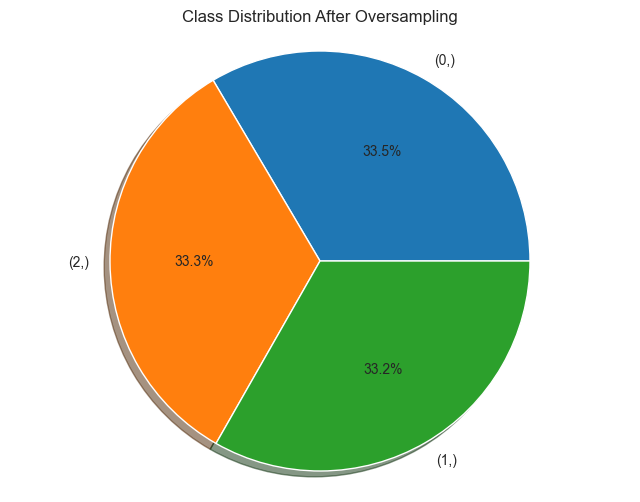

In [58]:
# Generate a pie chart for class distribution after oversampling
plt.figure(figsize=(8, 6))
plt.pie(class_distribution_after, labels=class_distribution_after.index, autopct='%1.1f%%', shadow=True)
plt.title('Class Distribution After Oversampling')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [59]:
X_balanced_features = balanced_features_df.iloc[:, 0:feature_end].values
y_balanced_features = balanced_features_df['labels'].values

In [60]:
X_balanced_features

array([[ 8.14000000e+02,  1.40000000e-01, -5.00000000e-03, ...,
         1.00000000e-01, -2.00000000e-02, -7.50000000e-02],
       [ 9.90000000e+02,  5.00000000e-02,  2.15000000e-01, ...,
        -4.00000000e-02,  5.00000000e-02,  0.00000000e+00],
       [ 8.88000000e+02,  1.00000000e-02, -4.00000000e-02, ...,
         6.00000000e-02,  0.00000000e+00, -5.00000000e-02],
       ...,
       [ 7.70837808e+02, -7.59468807e-01, -7.49026464e-01, ...,
         7.74631381e-02, -1.41587843e-03, -1.61947072e-02],
       [ 8.42083547e+02,  8.97493589e-02,  1.30459509e-01, ...,
         7.92063031e-02,  1.52088676e-02, -5.97075854e-02],
       [ 3.84912561e+02, -7.10169096e-02, -1.15985515e-01, ...,
         1.49420285e-02, -4.00000000e-02,  2.83140095e-02]])

In [61]:
X_balanced_features.shape

(27049, 98)

In [62]:
from sklearn.model_selection import train_test_split
# First, split the data into train (80%) and test (20%)
X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_balanced_features, y_balanced_features, test_size=0.2, random_state=42)

In [63]:
import numpy as np
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, MaxPooling1D, Flatten, BatchNormalization, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import keras

In [64]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

In [65]:
# Reshape the input features for CNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [66]:
X_train_reshaped.shape

(21639, 98, 1)

In [67]:
X_test_reshaped.shape

(5410, 98, 1)

In [68]:
named_labels = ['MI', 'NORM', 'OTHER']
named_labels = np.array(named_labels)
named_labels

array(['MI', 'NORM', 'OTHER'], dtype='<U5')

In [69]:
# Define the lSTM model (First)
def create_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], 1), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(X_train_reshaped.shape[1], activation='relu'))
    model.add(Dense(len(named_labels), activation='softmax'))

    # Print the model summary
    model.summary()

    # # EarlyStopping
    # early_stopping = EarlyStopping(monitor='val_loss', patience=30)

    # Compile the model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='RMSprop')
    return model

In [70]:
#EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

In [71]:
# Convert multiclass labels to one-hot encoding
y_train_onehot = to_categorical(y_train_features, num_classes=len(named_labels))
y_train_onehot

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [72]:
y_train_onehot.shape

(21639, 3)

In [73]:
# Convert multiclass labels to one-hot encoding
y_test_onehot = to_categorical(y_test_features, num_classes=len(named_labels))
y_test_onehot

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [74]:
# Perform k-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
confusion_matrices = []
train_losses = []
val_losses = []
fold_models = []
train_accuracies = []
val_accuracies = []

for train_index, val_index in kfold.split(X_train_reshaped, y_train_features):
    train_X, val_X = X_train_reshaped[train_index], X_train_reshaped[val_index]
    train_y, val_y = y_train_onehot[train_index], y_train_onehot[val_index]
    
    #Create Model
    model = create_model()
    
    # Train the model
    history = model.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=80, batch_size=128, callbacks=[early_stopping])
    
    # Calculate training and validation losses
    training_loss = history.history['loss'] 
    validation_loss = history.history['val_loss']
    
    train_losses.append(training_loss)
    val_losses.append(validation_loss)
    
    # Extract train and validation accuracies from the training history
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Store the accuracies for each fold
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    # Evaluate the model on validation set
    _, accuracy = model.evaluate(val_X, val_y)
    accuracy_scores.append(accuracy)
    
    # Save the model
    fold_models.append(model)
    
    # Make predictions on validation set
    Y_pred = model.predict(val_X)
    Y_pred_labels = np.argmax(Y_pred, axis=1)
    Y_true_labels = np.argmax(val_y, axis=1)

    # Matriks konfusi
    conf_matrix = confusion_matrix(Y_true_labels, Y_pred_labels, labels=np.arange(len(named_labels)))
    confusion_matrices.append(conf_matrix)

# Rata-rata akurasi dan matriks konfusi pada semua lipatan
mean_accuracy = np.mean(accuracy_scores)
mean_conf_matrix = np.sum(confusion_matrices, axis=0)

print("Mean Accuracy:", mean_accuracy)
print("Mean Confusion Matrix:")
print(mean_conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(Y_true_labels, Y_pred_labels, labels=np.arange(len(named_labels)), target_names=named_labels))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 98, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 98, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 98, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 98, 64)            0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 98)                614754    
                                                                 
 dense_1 (Dense)             (None, 3)                 2

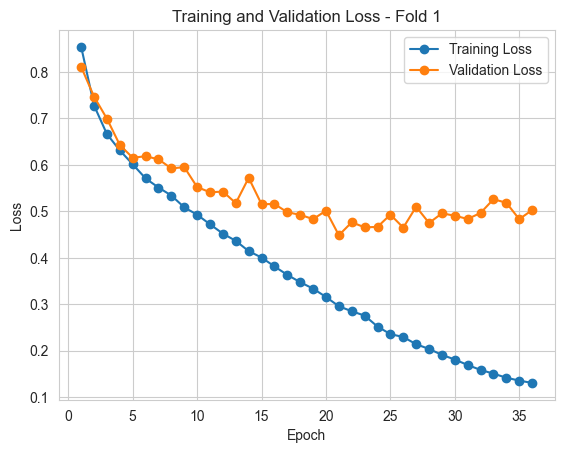

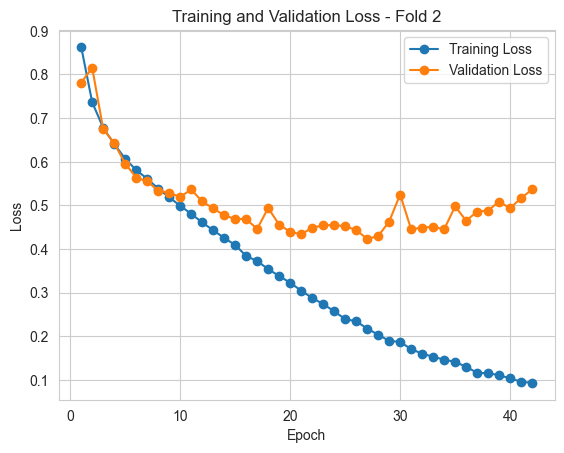

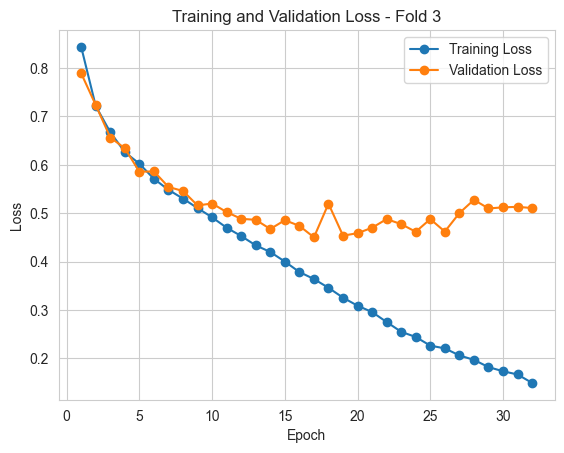

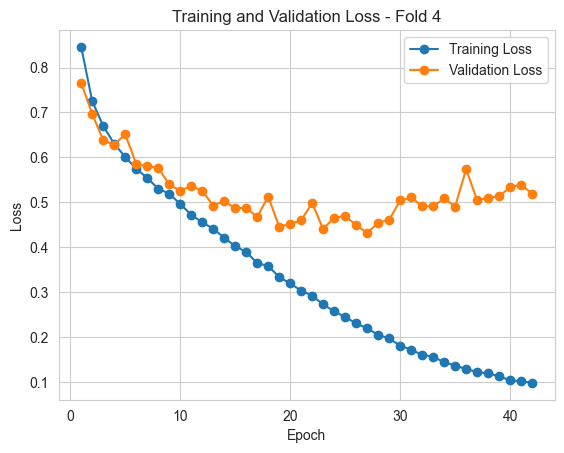

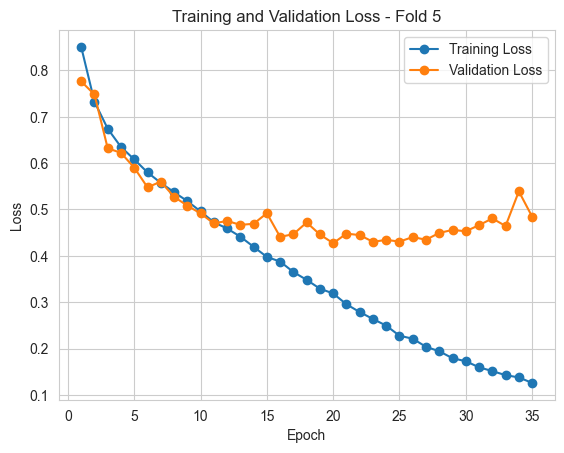

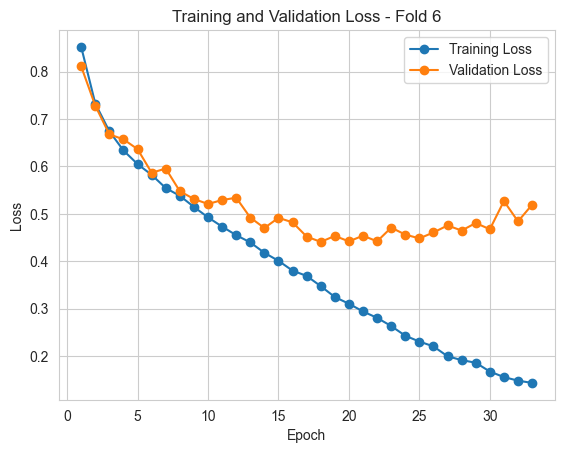

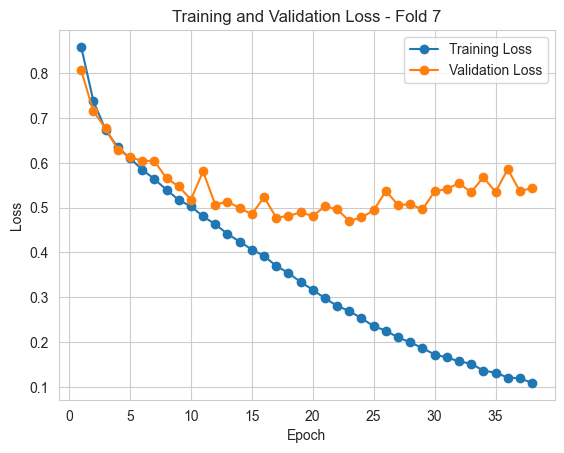

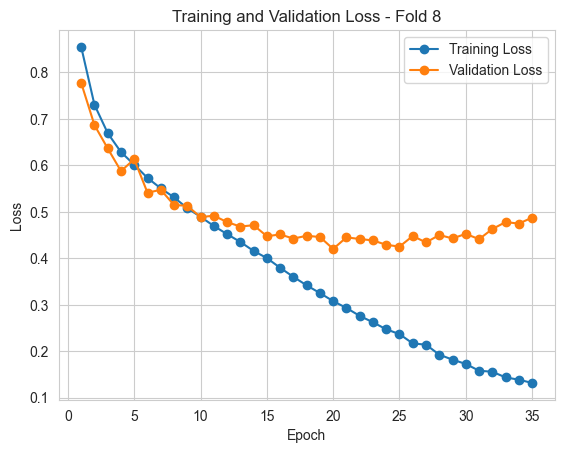

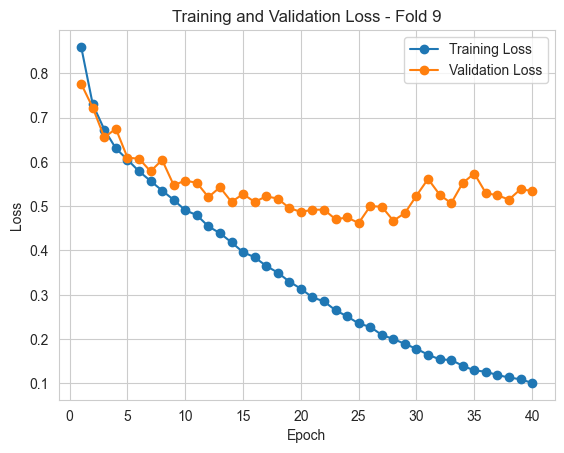

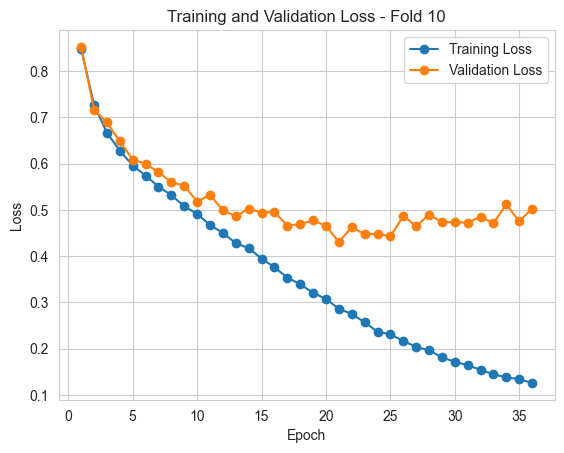

In [75]:
# Plot the training and validation losses for each fold
k = 10
fold_numbers = range(1, k+1)
for fold in fold_numbers:
    plt.plot(range(1, len(train_losses[fold-1])+1), train_losses[fold-1], marker='o', label='Training Loss')
    plt.plot(range(1, len(val_losses[fold-1])+1), val_losses[fold-1], marker='o', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss - Fold {fold}')
    plt.legend()
    plt.show()

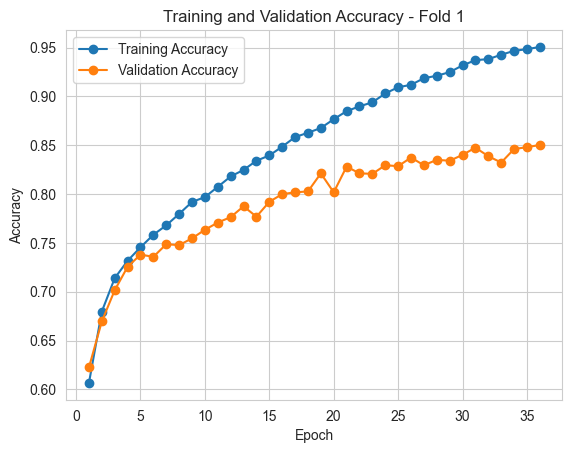

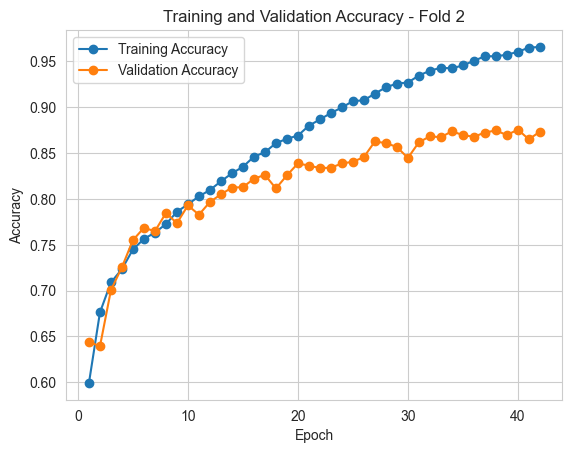

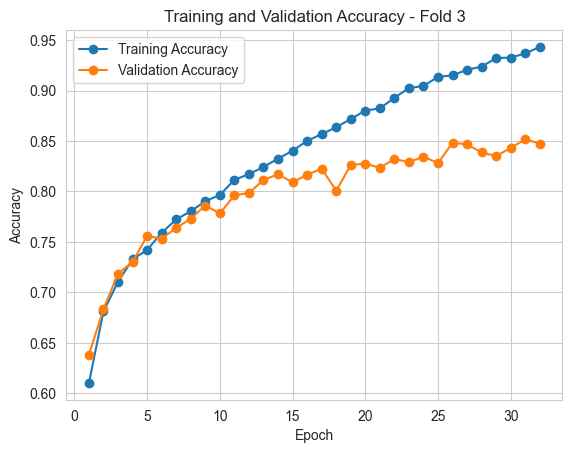

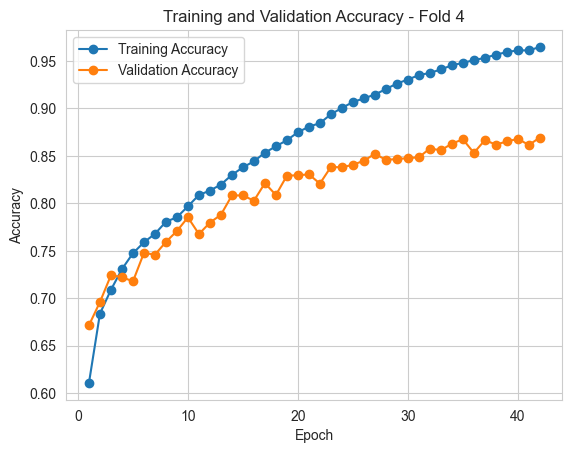

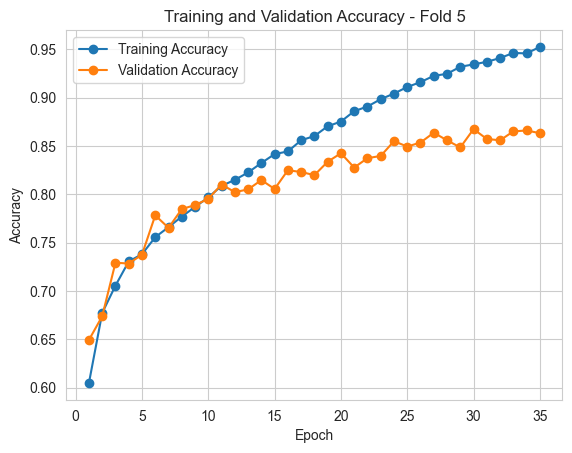

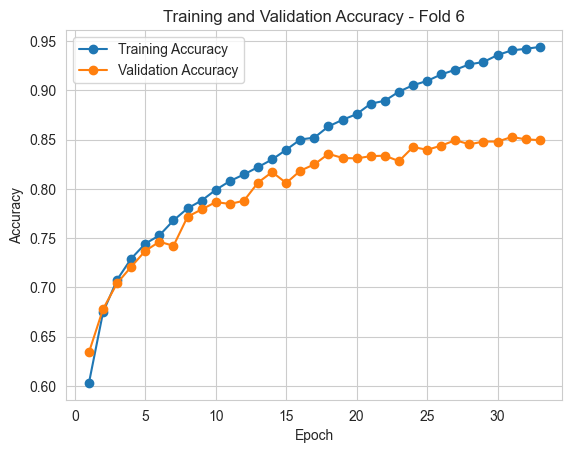

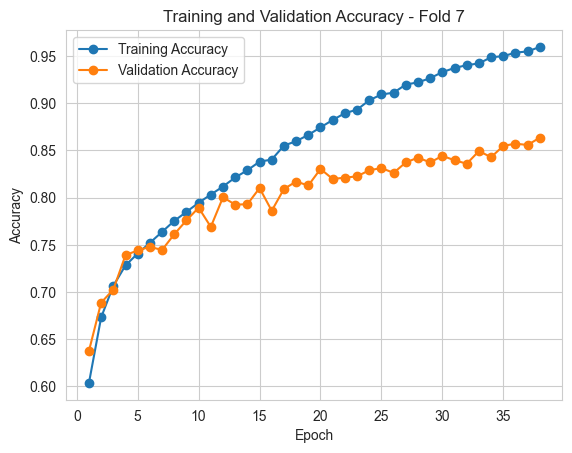

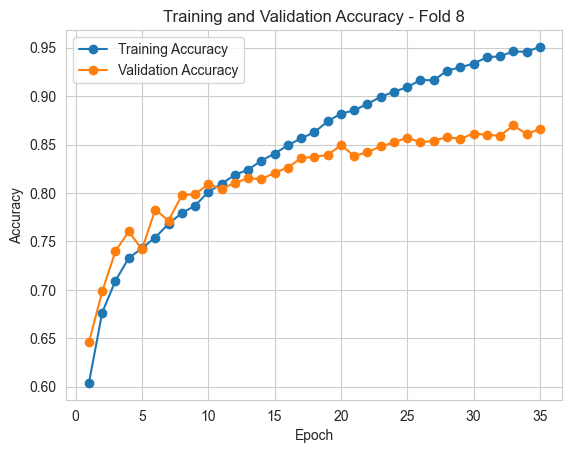

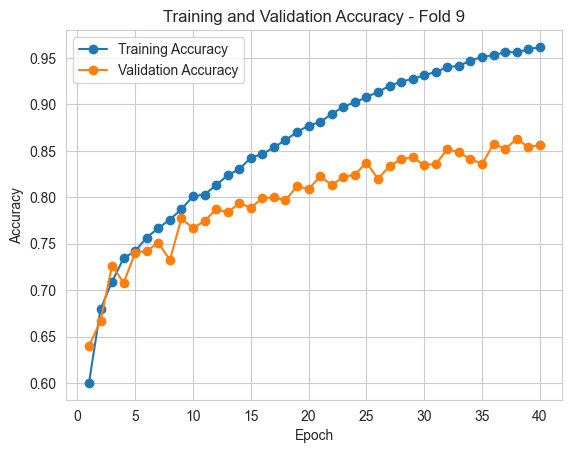

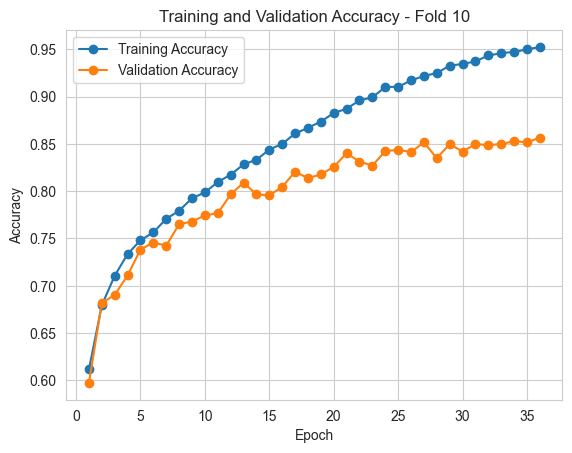

In [76]:
# Plot the training and validation accuracies for each fold
k = 10
fold_numbers = range(1, k+1)
for fold in fold_numbers:
    plt.plot(range(1, len(train_accuracies[fold-1])+1), train_accuracies[fold-1], marker='o', label='Training Accuracy')
    plt.plot(range(1, len(val_accuracies[fold-1])+1), val_accuracies[fold-1], marker='o', label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy - Fold {fold}')
    plt.legend()
    plt.show()

In [77]:
# Sensitivitas (Sensitivity) dan Spesifisitas (Specificity)
sensitivities = []
specificities = []

for conf_matrix in confusion_matrices:
    true_positive = np.diag(conf_matrix)
    false_negative = np.sum(conf_matrix, axis=1) - true_positive
    false_positive = np.sum(conf_matrix, axis=0) - true_positive
    true_negative = np.sum(conf_matrix) - (true_positive + false_negative + false_positive)

    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    sensitivities.append(sensitivity)
    specificities.append(specificity)

mean_sensitivity = np.mean(sensitivities)
mean_specificity = np.mean(specificities)

print("Mean Sensitivity:", mean_sensitivity)
print("Mean Specificity:", mean_specificity)

Mean Sensitivity: 0.8590370411913544
Mean Specificity: 0.929830013899582


In [78]:
# Plot the training and validation losses for each fold
k = 10
fold_numbers = range(1, k+1)
for fold in fold_numbers:
    # Make predictions on test set
    best_model = fold_models[fold-1]
    Y_predict = best_model.predict(X_test_reshaped)
    Y_predict_labels = np.argmax(Y_predict, axis=1)
    Y_tr_labels = np.argmax(y_test_onehot, axis=1)

    # Matriks konfusi
    cf_matrix = confusion_matrix(Y_tr_labels, Y_predict_labels, labels=np.arange(len(named_labels)))
    print("Fold :", fold)
    print("Confusion Matrix : ")
    print(cf_matrix)

    print("Classification Report:")
    print(classification_report(Y_tr_labels, Y_predict_labels, labels=np.arange(len(named_labels)), target_names=named_labels))

170/170 [==============================] - 8s 47ms/step
Fold : 1
Confusion Matrix : 
[[1596   74   69]
 [ 101 1535  204]
 [  88  233 1510]]
Classification Report:
              precision    recall  f1-score   support

          MI       0.89      0.92      0.91      1739
        NORM       0.83      0.83      0.83      1840
       OTHER       0.85      0.82      0.84      1831

    accuracy                           0.86      5410
   macro avg       0.86      0.86      0.86      5410
weighted avg       0.86      0.86      0.86      5410

170/170 [==============================] - 8s 47ms/step
Fold : 2
Confusion Matrix : 
[[1626   48   65]
 [ 134 1480  226]
 [  88  204 1539]]
Classification Report:
              precision    recall  f1-score   support

          MI       0.88      0.94      0.91      1739
        NORM       0.85      0.80      0.83      1840
       OTHER       0.84      0.84      0.84      1831

    accuracy                           0.86      5410
   macro avg       0.

In [79]:
# Make predictions on test set
best_fold = 7
best_model = fold_models[best_fold-1]
Y_predict = best_model.predict(X_test_reshaped)
Y_predict_labels = np.argmax(Y_predict, axis=1)
Y_tr_labels = np.argmax(y_test_onehot, axis=1)
 # Matriks konfusi
cf_matrix = confusion_matrix(Y_tr_labels, Y_predict_labels, labels=np.arange(len(named_labels)))
print("Best Fold :", best_fold)
print("Confusion Matrix : ")
print(cf_matrix)

print("Classification Report:")
print(classification_report(Y_tr_labels, Y_predict_labels, labels=np.arange(len(named_labels)), target_names=named_labels))

170/170 [==============================] - 8s 47ms/step
Best Fold : 7
Confusion Matrix : 
[[1586   71   82]
 [ 117 1500  223]
 [  76  222 1533]]
Classification Report:
              precision    recall  f1-score   support

          MI       0.89      0.91      0.90      1739
        NORM       0.84      0.82      0.83      1840
       OTHER       0.83      0.84      0.84      1831

    accuracy                           0.85      5410
   macro avg       0.85      0.85      0.85      5410
weighted avg       0.85      0.85      0.85      5410



In [80]:
true_positive = np.diag(cf_matrix)
false_negative = np.sum(cf_matrix, axis=1) - true_positive
false_positive = np.sum(cf_matrix, axis=0) - true_positive
true_negative = np.sum(cf_matrix) - (true_positive + false_negative + false_positive)

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: [0.9120184  0.81521739 0.83724741]
Specificity: [0.94742577 0.91792717 0.91478066]


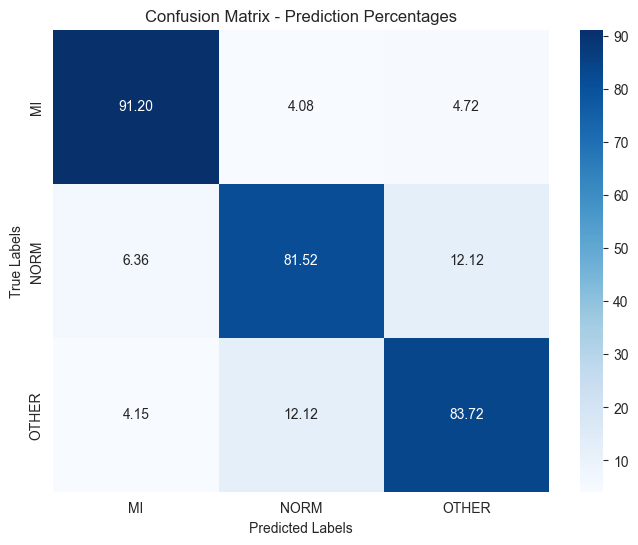

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate percentages for each true class
conf_matrix_percentage = cf_matrix / cf_matrix.sum(axis=1, keepdims=True) * 100

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=named_labels, yticklabels=named_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Prediction Percentages')
plt.show()

In [82]:
import pickle
with open('modelrms_LSTM', 'wb') as f :
    pickle.dump(best_model, f)

In [83]:
with open('allrms_LSTM', 'wb') as f :
    pickle.dump(fold_models, f)

In [84]:
with open('test_CNN.npy', 'wb') as f :
    np.save(f, X_test_reshaped)

In [85]:
with open('y_test_onehot_CNN.npy', 'wb') as f :
    np.save(f, y_test_onehot)

In [83]:
test_data2 = np.load('test_CNN.npy')